In [181]:
import random
import networkx as nx
import numpy as np
from tqdm import tqdm

import city_tests
import graph_generator

import matplotlib.pyplot as plt
import networkx as nx

# installation easiest via pip:
# pip install netgraph
from netgraph import Graph

import map_drawer



N = 1000

G = nx.fast_gnp_random_graph(N, 1 /  N, seed=123, directed=False)
if not nx.is_connected(G):
    tmp = []
    for n in nx.connected_components(G):
        for q in n:
            tmp.append(q)
            break
    for i in range(len(tmp) - 1):
        G.add_edge(tmp[i], tmp[i + 1])
print('be connected: {}'.format(nx.is_connected(G)), nx.density(G))
for e in G.edges:
    l = np.random.random_sample()
    G.add_edge(e[0], e[1], length=l)
communities = graph_generator.resolve_communities(G, 100)


be connected: True 0.002006006006006006
generate communities


In [182]:
def get_color_list(color_len: int):
    cmap = plt.get_cmap('YlOrRd', 30)
    colors = [cmap(i / color_len) for i in range(color_len)]
    random.shuffle(colors)
    hex_colors = ['#' + ''.join([f'{int(c * 255):02x}' for c in color[:3]]) \
                  for color in colors]
    return hex_colors

In [183]:

print('alpha:',len(communities)/ 2000)
node_to_community = dict()
node = 0
for community_id, nodes in enumerate(communities):
    for n in nodes:
        node_to_community[n] = community_id

# colors = map_drawer.get_color_list_s(G,communities, graph_generator.get_cluster_to_neighboring_clusters(G))
colors = get_color_list(len(communities))
# colors = {
#     0 : 'tab:blue',
#     1 : 'tab:orange',
#     2 : 'tab:green',
#     3 : 'tab:red',
# }
random.shuffle(colors)
# print('colors:', colors)



alpha: 0.1625


In [184]:
print(len(communities))
cls_to_n = graph_generator.get_cluster_to_neighboring_clusters(G)
position_cluster = {c : [c % 13, c//13] for c in range(len(communities))}

nodes = [u for u in communities[0]]
print(G.nodes[nodes[0]])
for n in cls_to_n[0]:
    for u in communities[n]:
        nodes.append(u)
GG = graph_generator.extract_cluster_list_subgraph(G,nodes)
GG = G

325
{'cluster': 0}


In [185]:
node_color = [colors[d['cluster'] % 4] for u,d in GG.nodes(data=True)]

def position(d):
    x,y = position_cluster[d['cluster']]
    return [x + random.random(),y + random.random()]

p = {u : position(d) for u,d in GG.nodes(data=True)}

In [186]:
label = {u:d['cluster'] for u,d in GG.nodes(data=True)}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


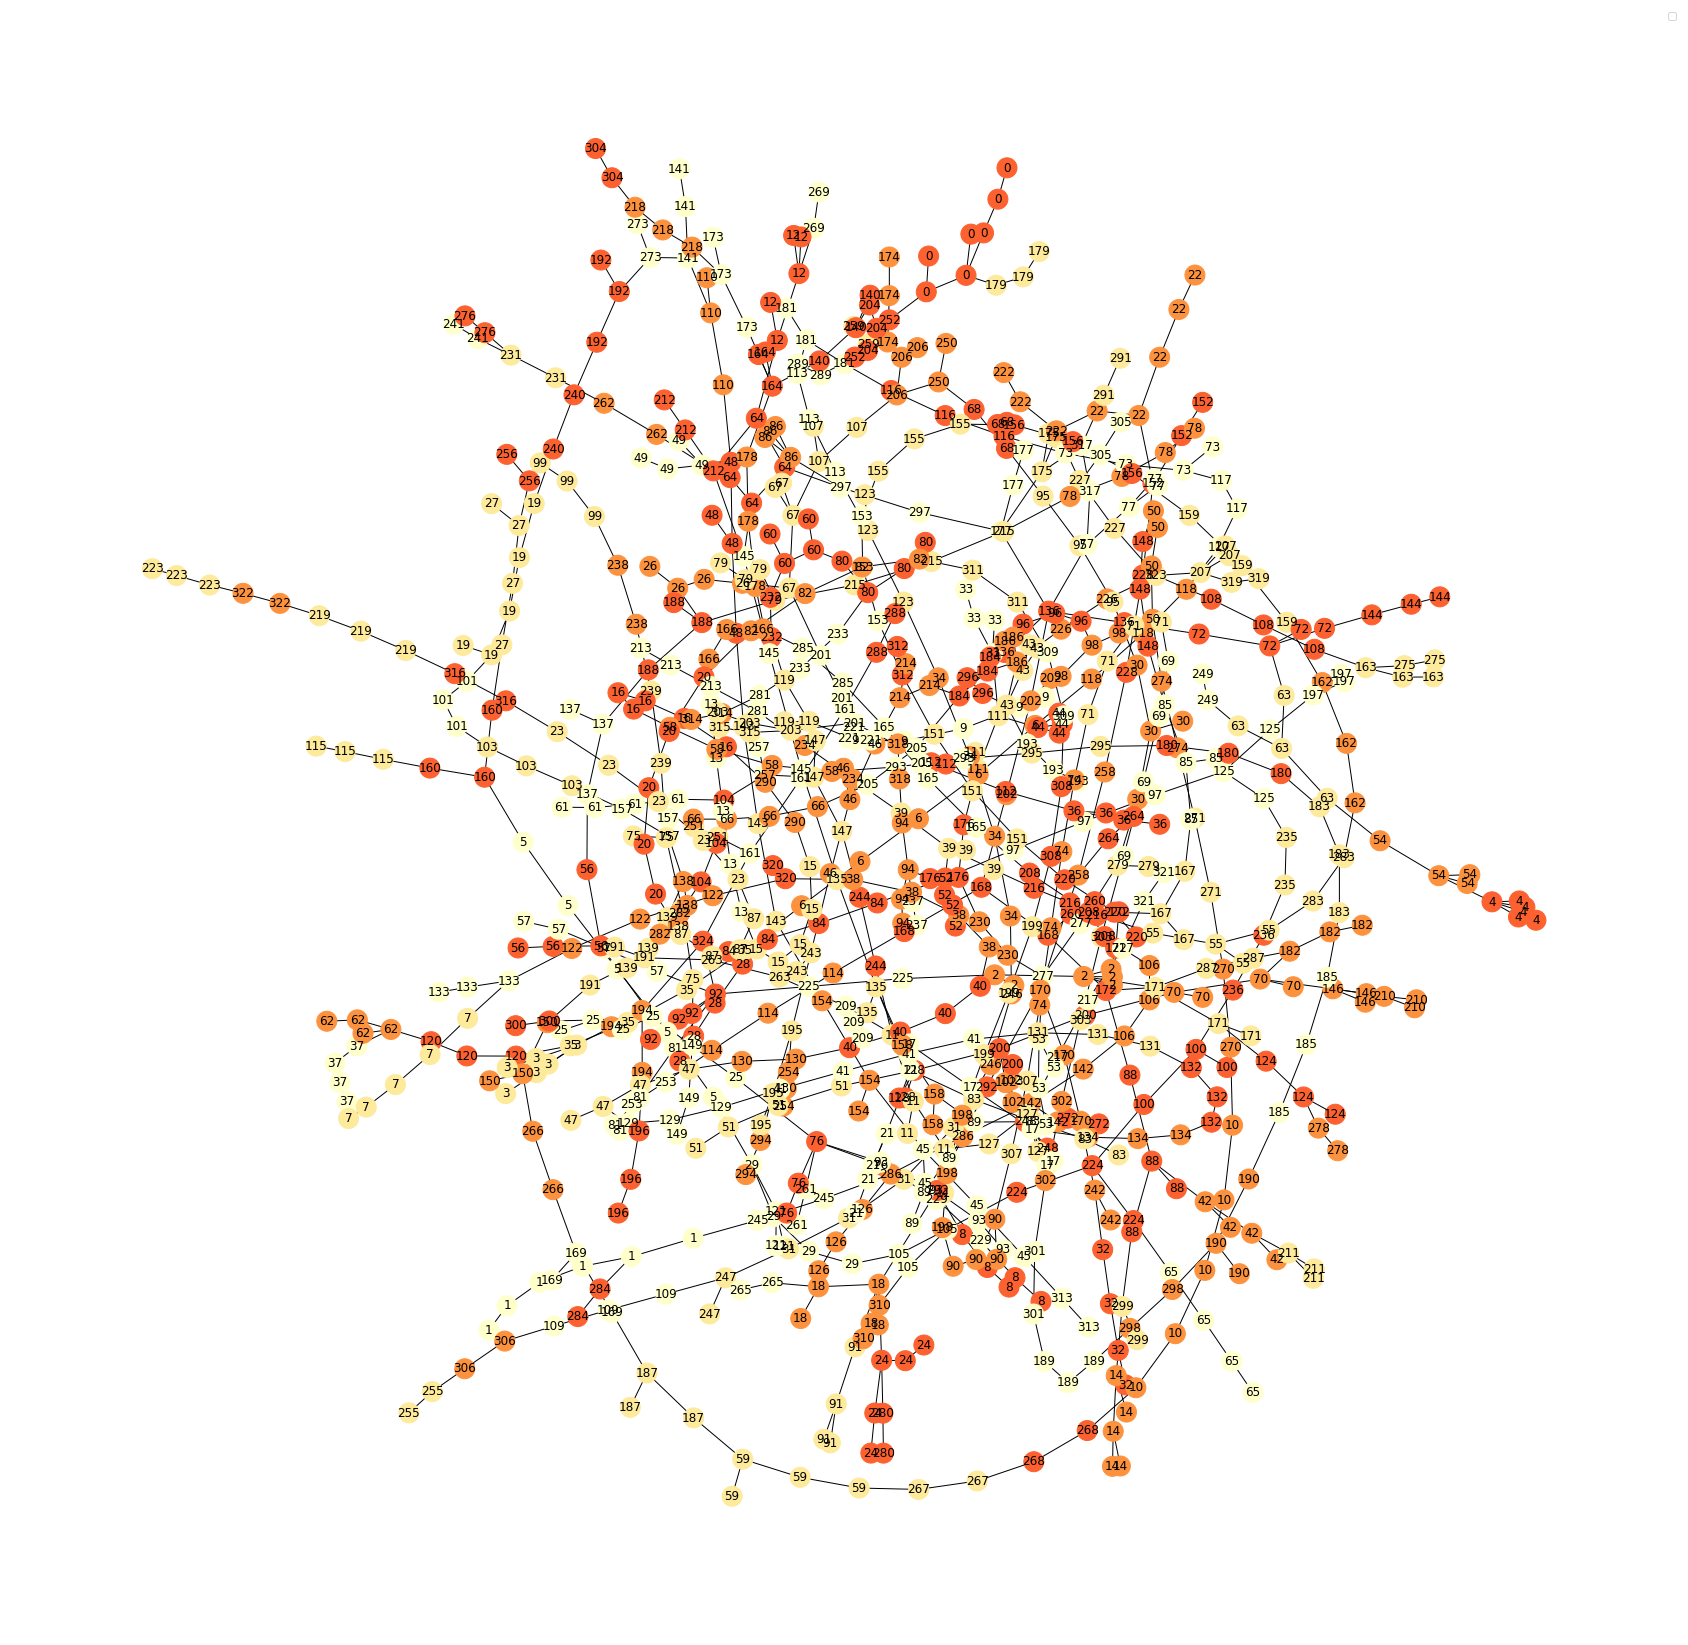

In [187]:

fig, axs = plt.subplots(1, 1)
fig.set_figwidth(30)
fig.set_figheight(30)
nx.draw(GG,ax=axs, node_color=list(node_color), node_size = 400, labels = label)
plt.legend()
plt.show()


In [188]:
print(nx.is_connected(GG))

True
